In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

A = np.array([[0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [-2,1,0,-2,1,0],
              [1,-2,1,1,-2,1],
              [0,1,-2,0,1,-2]], dtype=float)
C = np.array([[1,0,0,0,0,0]], dtype=float)

A = sl.expm(0.1*A)

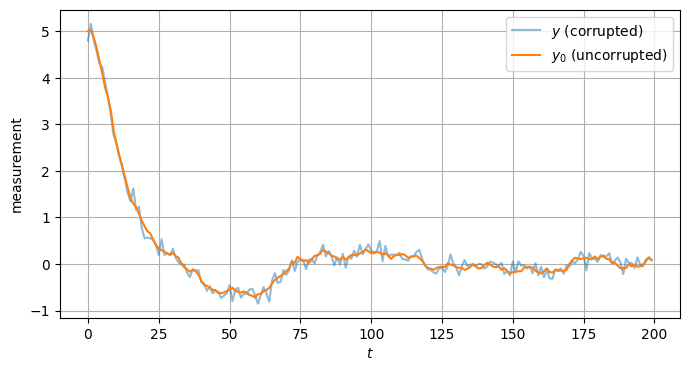

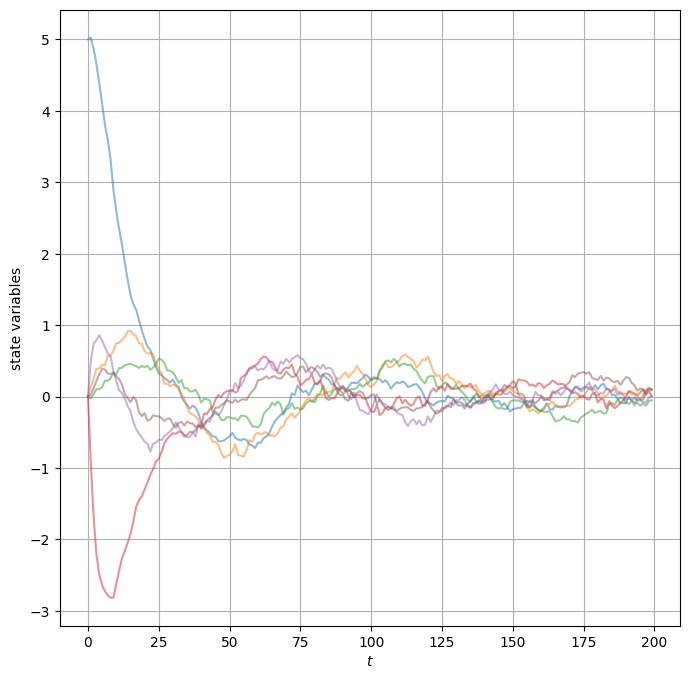

In [2]:
np.random.seed(6009)
x_hist = []
y_hist = []
y0_hist = []
x = np.array([5,0,0,0,0,0])

for t in range(200):
  y0 = C.dot(x)
  y = y0 + 0.1*np.random.randn(1)
  x_hist.append(x)
  y_hist.append(y)
  y0_hist.append(y0)
  x = A.dot(x) + 0.05*np.random.randn(6)


plt.figure(figsize=(8,4), dpi=100)
plt.plot(y_hist, alpha=0.5, label = r'$y$ (corrupted)')
plt.plot(y0_hist, label = r'$y_0$ (uncorrupted)')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel('measurement')
plt.grid()
plt.show()

plt.figure(figsize=(8,8), dpi=100)
plt.plot(x_hist, alpha=0.5)
plt.xlabel(r'$t$')
plt.ylabel('state variables')
plt.grid()
plt.show()

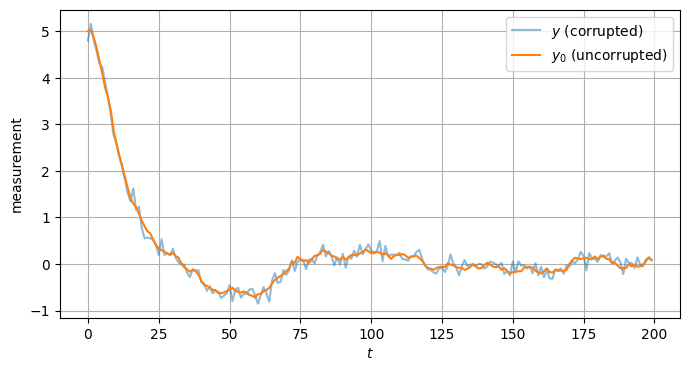

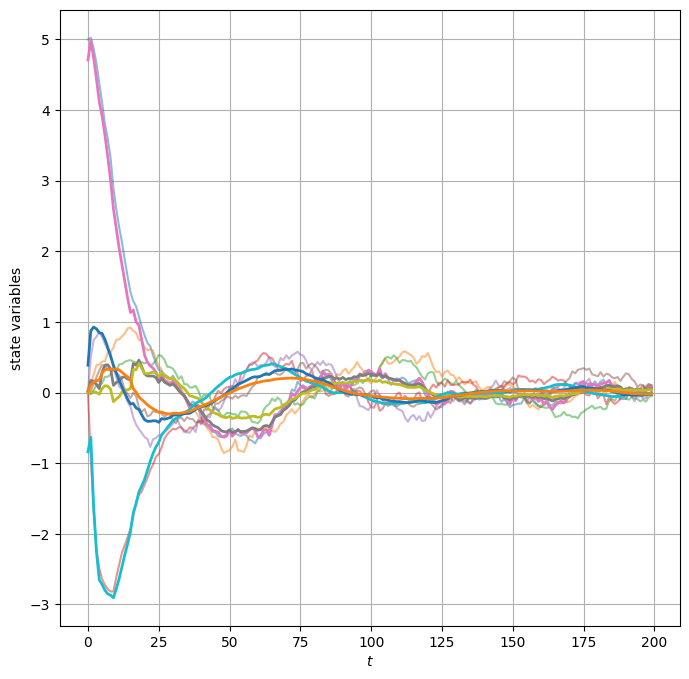

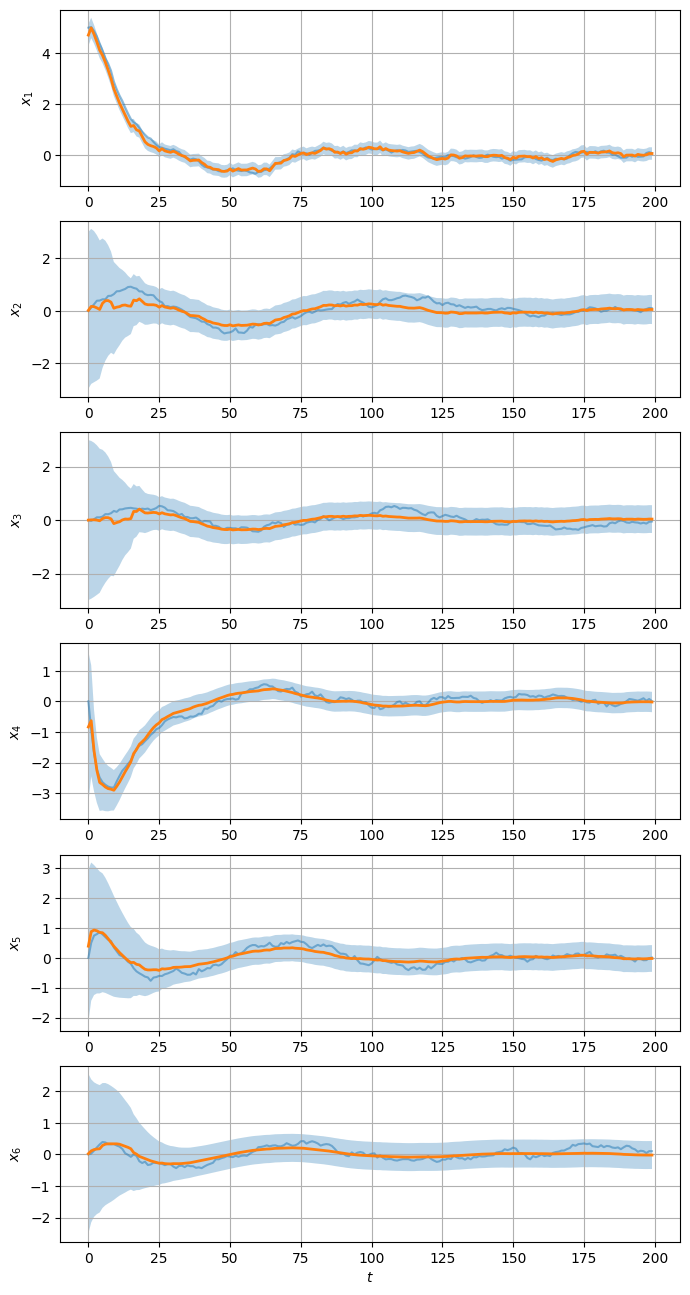

In [3]:
np.random.seed(6009)
x_hist = []
y_hist = []
y0_hist = []
xhat_hist = []
Sigma_hist = []

x = np.array([5,0,0,0,0,0])

xhat = np.zeros(6)
Sigma = 1.0*np.eye(6)
W = 0.05**2*np.eye(6)
V = 0.1**2*np.eye(1)

for t in range(200):
  y0 = C.dot(x)
  y = y0 + 0.1*np.random.randn(1)

  L = A@Sigma@C.T@np.linalg.inv(C@Sigma@C.T+V)
  xhat = A@xhat + L@(y - C@xhat)
  Sigma = A@Sigma@A.T + W - L@C@Sigma@A.T

  x_hist.append(x)
  y_hist.append(y)
  y0_hist.append(y0)
  xhat_hist.append(xhat)
  Sigma_hist.append(Sigma)

  x = A.dot(x) + 0.05*np.random.randn(6)

plt.figure(figsize=(8,4), dpi=100)
plt.plot(y_hist, alpha=0.5, label = r'$y$ (corrupted)')
plt.plot(y0_hist, label = r'$y_0$ (uncorrupted)')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel('measurement')
plt.grid()
plt.show()

plt.figure(figsize=(8,8), dpi=100)
plt.plot(x_hist, alpha=0.5)
plt.plot(xhat_hist, linewidth=2)
plt.xlabel(r'$t$')
plt.ylabel('state variables')
plt.grid()
plt.show()

plt.figure(figsize=(8,16), dpi=100)
for i in range(6):
  plt.subplot(6,1,i+1)
  plt.plot(np.array(x_hist)[:,i], alpha=0.5)
  plt.plot(np.array(xhat_hist)[:,i], linewidth=2)
  mean = np.array(xhat_hist)[:,i]
  band = [3*np.sqrt(Sig[i,i]) for Sig in Sigma_hist]
  plt.fill_between(np.arange(200), mean-band, mean+band, alpha=0.3)
  plt.ylabel(rf'$x_{i+1}$')
  plt.grid()
plt.xlabel(r'$t$')
plt.show()